### Lecture 04:

**Backpropagation**: Algorithm to caculate gradient  for all the weights in the network with several weights. 

* It uses the `Chain Rule` to calcuate the gradient for multiple nodes at the same time. 
* In pytorch this is implemented using a `variable` data type and `loss.backward()` method to get the gradients

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Using .backward method for linear regression

$y = x * w$

$loss =(\hat{y}-y)^2$

In [2]:
# Input data

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [3]:
w = torch.tensor([1.0], requires_grad=True)

In [4]:
def forward(x):
    return x*w

In [5]:
def loss(y_pred,y):
    return (y_pred-y)**2

In [6]:
# Training loop

print('Predict (before training)', 4, forward(4).item())

# Training loop

for epoch in range(10):
#     l_sum=0
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) # Forward pass
        l = loss(y_pred,y_val) # Loss
        l.backward() # Backpropagation
        print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
        
    print(f"Epoch: {epoch} | Loss: {l.item()} | w: {w.item()}")
#     w_list.append(w)
#     mse_list.append(l_sum/3)
    
    
print('Predict (After training)', '4 hours', forward(4).item())    

Predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
Epoch: 0 | Loss: 7.315943717956543 | w: 1.260688066482544
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
Epoch: 1 | Loss: 3.9987640380859375 | w: 1.4534177780151367
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
Epoch: 2 | Loss: 2.1856532096862793 | w: 1.5959051847457886
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
Epoch: 3 | Loss: 1.1946394443511963 | w: 1.7012479305267334
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
Epoch: 4 | Loss: 0.6529689431190491 | w: 1.779128909111023
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
Epoch: 5 | Loss: 0.35690122842788696 | w: 1.836707

#### Using backward propagation for quadratic model

$\hat{y} = x^2*w_{2} + x*w_{1} + b$

$loss = (\hat{y}-y)^2$

* Using Dummy values of x and y

`x = 1,2,3,4,5`
`y = 1,6,15,28,45`

In [14]:
x_data = [1.0, 2.0, 3.0, 4.0, l5.0]
y_data = [1.0, 6.0, 15.0, 28,45]

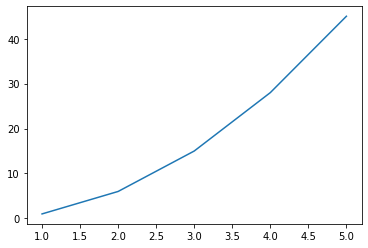

In [15]:
plt.plot(x_data,y_data)
plt.show()

In [28]:
# Initialize w2 and w1 with randon values

w_1 = torch.tensor([1.0], requires_grad=True)
w_2 = torch.tensor([1.0], requires_grad=True)

In [17]:
# Quadratic forward pass based on the function above. Taking b as zero for now

def quad_forward(x):
    return w_1*(x**2)+w_2*x

In [18]:
# Loss fucntion as per the defination above

def loss(y_pred,y):
    return (y_pred-y)**2

In [29]:
# Training loop

print('Predict (before training)', 6, quad_forward(6).item())

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = quad_forward(x_val)
        l = loss(y_pred, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w_1.grad.item(), w_1.grad.item())
        w_1.data = w_1.data - 0.0012*w_1.grad.item()
        w_2.data = w_2.data - 0.0012*w_2.grad.item()
        
        # Manually zero the gradients after updating weights
        w_1.grad.data.zero_()
        w_2.grad.data.zero_()
        
    print(f"Epoch: {epoch} | Loss: {l.item()} | w1: {w_1.item()} | w2: {w_2.item()}")


print('Predict (After training)', 6, quad_forward(6).item())

Predict (before training) 6 42.0
	grad:  1.0 1.0 2.0 2.0
	grad:  2.0 6.0 -0.11520004272460938 -0.11520004272460938
	grad:  3.0 15.0 -54.492271423339844 -54.492271423339844
	grad:  4.0 28 -221.18634033203125 -221.18634033203125
	grad:  5.0 45 -317.8537292480469 -317.8537292480469
Epoch: 0 | Loss: 40.41239929199219 | w1: 1.7099769115447998 | w2: 1.1621068716049194
	grad:  1.0 1.0 3.7441673278808594 3.7441673278808594
	grad:  2.0 6.0 25.097305297851562 25.097305297851562
	grad:  3.0 15.0 63.107460021972656 63.107460021972656
	grad:  4.0 28 66.03076171875 66.03076171875
	grad:  5.0 45 -75.12264251708984 -75.12264251708984
Epoch: 1 | Loss: 2.257364511489868 | w1: 1.610548496246338 | w2: 1.115532636642456
	grad:  1.0 1.0 3.452162265777588 3.452162265777588
	grad:  2.0 6.0 21.187225341796875 21.187225341796875
	grad:  3.0 15.0 45.44755554199219 45.44755554199219
	grad:  4.0 28 23.84320068359375 23.84320068359375
	grad:  5.0 45 -109.37328338623047 -109.37328338623047
Epoch: 2 | Loss: 4.7850060

Epoch: 44 | Loss: 1.99907648563385 | w1: 1.7487173080444336 | w2: 0.41476961970329285
	grad:  1.0 1.0 2.3269739151000977 2.3269739151000977
	grad:  2.0 6.0 14.461235046386719 14.461235046386719
	grad:  3.0 15.0 31.806793212890625 31.806793212890625
	grad:  4.0 28 19.48040771484375 19.48040771484375
	grad:  5.0 45 -70.03307342529297 -70.03307342529297
Epoch: 45 | Loss: 1.9618525505065918 | w1: 1.7510664463043213 | w2: 0.4015416204929352
	grad:  1.0 1.0 2.3052163124084473 2.3052163124084473
	grad:  2.0 6.0 14.326011657714844 14.326011657714844
	grad:  3.0 15.0 31.50937271118164 31.50937271118164
	grad:  4.0 28 19.29815673828125 19.29815673828125
	grad:  5.0 45 -69.37847137451172 -69.37847137451172
Epoch: 46 | Loss: 1.9253488779067993 | w1: 1.7533941268920898 | w2: 0.3884373605251312
	grad:  1.0 1.0 2.283662796020508 2.283662796020508
	grad:  2.0 6.0 14.192070007324219 14.192070007324219
	grad:  3.0 15.0 31.214801788330078 31.214801788330078
	grad:  4.0 28 19.11785888671875 19.11785888671

	grad:  4.0 28 12.065185546875 12.065185546875
	grad:  5.0 45 -43.37482452392578 -43.37482452392578
Epoch: 96 | Loss: 0.7525501847267151 | w1: 1.8458234071731567 | w2: -0.13195794820785522
	grad:  1.0 1.0 1.4277310371398926 1.4277310371398926
	grad:  2.0 6.0 8.872783660888672 8.872783660888672
	grad:  3.0 15.0 19.515254974365234 19.515254974365234
	grad:  4.0 28 11.9522705078125 11.9522705078125
	grad:  5.0 45 -42.969322204589844 -42.969322204589844
Epoch: 97 | Loss: 0.7385450601577759 | w1: 1.8472650051116943 | w2: -0.14007404446601868
	grad:  1.0 1.0 1.414381980895996 1.414381980895996
	grad:  2.0 6.0 8.789825439453125 8.789825439453125
	grad:  3.0 15.0 19.332778930664062 19.332778930664062
	grad:  4.0 28 11.84051513671875 11.84051513671875
	grad:  5.0 45 -42.56763458251953 -42.56763458251953
Epoch: 98 | Loss: 0.7248014211654663 | w1: 1.8486931324005127 | w2: -0.14811421930789948
	grad:  1.0 1.0 1.4011578559875488 1.4011578559875488
	grad:  2.0 6.0 8.707645416259766 8.707645416259766